In [21]:
from gwpopulation.models.redshift import PowerLawRedshift
from bilby.core.result import read_in_result
from scipy.interpolate import interp1d
import numpy as np
import deepdish as dd
import matplotlib.pyplot as plt

PP_path = '/Users/asadh/Documents/Data/analyses/PowerLawPeak/o1o2o3_mass_c_iid_mag_iid_tilt_powerlaw_redshift_result.json'
PP_result = read_in_result(PP_path)

PP_hyperposterior_samples = PP_result.posterior.copy() # making a copy is best practice here so you don't accidentally modify things in-place
PP_hyperposterior_samples


PP_hyperposterior_samples.rename({'pdet_n_effective':'pdet_n_effective_lvk', 
                                  'min_event_n_effective':'min_event_n_effective_lvk',
                                 'rate' : 'rate_lvk'}, axis=1).sample(100).to_csv("./lvk_results.csv", index=False); 

In [22]:
PP_hyperposterior_samples

,alpha,beta,mmax,mmin,lam,mpp,sigpp,delta_m,mu_chi,sigma_chi,...,lamb,amax,log_likelihood,log_prior,selection,pdet_n_effective,surveyed_hypervolume,log_10_rate,rate,min_event_n_effective
0,3.476035,1.192781,91.137635,3.335027,0.045152,32.019619,7.361617,5.502380,0.430299,0.037676,...,0.593878,1.0,86.219165,-20.158271,0.001980,5600.884717,1102.923927,1.539321,34.619495,184.210871
1,2.843807,0.551632,92.336309,3.455594,0.099132,21.146326,9.635711,3.504334,0.229716,0.027052,...,3.899003,1.0,88.795439,-20.158271,0.000176,7628.305892,24548.963167,1.203419,15.974191,91.831207
2,4.127894,1.910420,99.382743,4.114949,0.058528,26.304442,9.105968,4.430823,0.297703,0.036759,...,-0.096742,1.0,89.598445,-20.158271,0.002577,4734.966457,617.064144,1.681428,48.020645,94.982019
3,4.512565,1.291055,98.845047,2.963035,0.007879,32.267134,9.914114,9.800366,0.378698,0.052658,...,3.511903,1.0,90.035214,-20.158271,0.000295,5654.797132,16703.390755,1.146385,14.008291,289.936772
4,2.772482,0.149371,94.491001,5.138160,0.035747,30.469008,8.569162,3.361789,0.336149,0.034270,...,2.514446,1.0,90.339131,-20.158271,0.000582,8247.427572,6336.065138,1.302851,20.084052,261.964627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11179,3.388853,1.075150,89.768520,4.684262,0.030388,35.727936,3.478996,5.246642,0.244086,0.027675,...,2.733047,1.0,107.871029,-20.158271,0.000525,3796.539977,7811.787060,1.235183,17.186329,71.639539
11180,3.684463,1.539779,81.785901,5.327478,0.030328,34.102957,3.505780,5.133147,0.251205,0.033394,...,3.171738,1.0,107.877236,-20.158271,0.000377,4006.532961,11954.783380,1.175202,14.969305,72.109121
11181,3.684463,1.539779,81.785901,5.327478,0.030328,34.102957,3.505780,5.133147,0.251205,0.033394,...,3.171738,1.0,107.877236,-20.158271,0.000377,4006.532961,11954.783380,1.169904,14.787819,72.109121
11182,3.573136,0.627634,88.689645,5.303211,0.029184,34.600418,3.531467,4.342366,0.229689,0.032670,...,3.456785,1.0,107.909312,-20.158271,0.000266,3745.787380,15818.169705,1.239911,17.374440,73.194989


In [57]:
import matplotlib

from matplotlib.gridspec import GridSpec

In [23]:
import gwpopulation

In [24]:
import jax.numpy as jnp
import numpy as np
from dataclasses import dataclass
import numpyro.distributions as dist
from typing import Dict
import jax
from gravpop import * 
import matplotlib.pyplot as plt
import scipy

filename = '/Users/asadh/Documents/Data/posteriors.pkl'
selection_filename = '/Users/asadh/Documents/GitHub/gravpop/test/testdata/test_selection_function.h5'
posterior_file = "./lvk_results.csv"

SM = SmoothedTwoComponentPrimaryMassRatio(primary_mass_name="mass_1_source")
R = PowerLawRedshift(z_max=2.3)
S_mag = BetaSpinMagnitudeIID(var_names = ['chi_1', 'chi_2'])
S_tilt = GaussianIsotropicSpinOrientationsIID(var_names = ['cos_tilt_1', 'cos_tilt_2'])

HP = HyperPosterior.from_file(posterior_file, filename, selection_filename, models=[SM,R,S_mag,S_tilt], samples_per_event=5000)
HP.calculate_rates()
HP.N_effective_cuts()
HP.posterior_with_cuts.to_csv("/Users/asadh/Documents/GitHub/gravpop_pipe/dev/samples_output_w_cuts_new.csv",index=False)

HERE
(69, 3194)


Calculating Rates : Selection Function ...:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating Rates : Surveyed Hypervolume ...:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating Event N_effective ...:   0%|          | 0/100 [00:00<?, ?it/s]

Calculating Selection Function N_effective ...:   0%|          | 0/100 [00:00<?, ?it/s]

In [25]:
HP.posterior['gaussian_mass_maximum'] = 100

In [26]:
import numpy as np

#posts = np.load("/Users/asadh/Documents/Data/posteriors.pkl", allow_pickle=True)
#[len(df) for ]
HP.likelihood.N_posterior_samples

3194

In [27]:
gwpop = GWPopLoader(posterior_file = "/Users/asadh/Documents/Data/posteriors.pkl",
                    prior_file = "/Users/asadh/Documents/Data/production.prior",
                    vt_file = "/Users/asadh/Downloads/o1+o2+o3_bbhpop_real+semianalytic-LIGO-T2100377-v2.hdf5",
                    enforce_minimum_neffective_per_event = "injection_resampling_vt",
                    max_redshift = 2.3, samples_per_posterior=5000)
gwpop.load_prior();
gwpop.load_model();
gwpop.load_vt();
gwpop.load_posteriors();
gwpop.create_likelihood();

17:18 bilby INFO    : Using SmoothedMassDistribution.
17:18 bilby INFO    : Created SmoothedMassDistribution with arguments {'mmin': 2, 'mmax': 100}
17:18 bilby INFO    : Using iid_spin_magnitude.
17:18 bilby INFO    : Using iid_spin_orientation.
17:18 bilby INFO    : Using PowerLawRedshift from gwpopulation.models.redshift.
17:18 bilby INFO    : Created gwpopulation.models.redshift.PowerLawRedshift with arguments {'z_max': 2.3}
17:18 bilby INFO    : Using SmoothedMassDistribution.
17:18 bilby INFO    : Created SmoothedMassDistribution with arguments {'mmin': 2, 'mmax': 100}
17:18 bilby INFO    : Using iid_spin_magnitude.
17:18 bilby INFO    : Using iid_spin_orientation.
17:18 bilby INFO    : Using PowerLawRedshift from gwpopulation.models.redshift.
17:18 bilby INFO    : Created gwpopulation.models.redshift.PowerLawRedshift with arguments {'z_max': 2.3}
17:18 bilby INFO    : Loading VT data from /Users/asadh/Downloads/o1+o2+o3_bbhpop_real+semianalytic-LIGO-T2100377-v2.hdf5.


In [28]:
cols = ['alpha', 'beta', 'mmax', 'mmin', 'lam', 'mpp', 'sigpp', 'delta_m', 'gaussian_mass_maximum',
       'mu_chi', 'sigma_chi', 'xi_spin', 'sigma_spin', 'lamb', 'amax','alpha_chi', 'beta_chi']

param = HP.posterior[cols].iloc[0,:].to_dict()

gwpop.likelihood.parameters.update(param)

from tqdm.auto import trange


col_new = 'min_event_n_effective_gwpop'
new_data = {col_new : np.zeros_like(HP.posterior['min_event_n_effective'].values)}
for i in trange(len(HP.posterior)):
    param = HP.posterior[cols].iloc[i,:].to_dict()
    gwpop.likelihood.parameters.update(param)
    new_data[col_new][i] = jnp.min(gwpop.likelihood.per_event_bayes_factors_and_n_effective_and_variances()[1])
    
    
HP.posterior.loc[:, col_new] = new_data[col_new];

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
gwpop = GWPopLoader(posterior_file = "/Users/asadh/Documents/Data/posteriors.pkl",
                    prior_file = "/Users/asadh/Documents/Data/production.prior",
                    vt_file = "/Users/asadh/Downloads/o1+o2+o3_bbhpop_real+semianalytic-LIGO-T2100377-v2.hdf5",
                    enforce_minimum_neffective_per_event = "injection_resampling_vt",
                    max_redshift = 2.3, samples_per_posterior=1000)
gwpop.load_prior();
gwpop.load_model();
gwpop.load_vt();
gwpop.load_posteriors();
gwpop.create_likelihood();

17:12 bilby INFO    : Using SmoothedMassDistribution.
17:12 bilby INFO    : Created SmoothedMassDistribution with arguments {'mmin': 2, 'mmax': 100}
17:12 bilby INFO    : Using iid_spin_magnitude.
17:12 bilby INFO    : Using iid_spin_orientation.
17:12 bilby INFO    : Using PowerLawRedshift from gwpopulation.models.redshift.
17:12 bilby INFO    : Created gwpopulation.models.redshift.PowerLawRedshift with arguments {'z_max': 2.3}
17:12 bilby INFO    : Using SmoothedMassDistribution.
17:12 bilby INFO    : Created SmoothedMassDistribution with arguments {'mmin': 2, 'mmax': 100}
17:12 bilby INFO    : Using iid_spin_magnitude.
17:12 bilby INFO    : Using iid_spin_orientation.
17:12 bilby INFO    : Using PowerLawRedshift from gwpopulation.models.redshift.
17:12 bilby INFO    : Created gwpopulation.models.redshift.PowerLawRedshift with arguments {'z_max': 2.3}
17:12 bilby INFO    : Loading VT data from /Users/asadh/Downloads/o1+o2+o3_bbhpop_real+semianalytic-LIGO-T2100377-v2.hdf5.


In [13]:
def transform_key(k):
    if k in ["chi_1", "chi_2"]:
        return k.replace('chi', 'a')
    return k
gwpop.likelihood.data = {transform_key(k):v for k,v in HP.likelihood.event_data.items()}
gwpop.likelihood.sampling_prior = HP.likelihood.event_data['prior']


col_new = 'min_event_n_effective_gwpop_w_gravpop_data'
new_data = {col_new : np.zeros_like(HP.posterior['min_event_n_effective'].values)}
for i in trange(len(HP.posterior)):
    param = HP.posterior[cols].iloc[i,:].to_dict()
    gwpop.likelihood.hyper_prior.parameters.update(param)
    gwpop.likelihood.parameters.update(param)
    new_data[col_new][i] = jnp.min(gwpop.likelihood.per_event_bayes_factors_and_n_effective_and_variances()[1])
    
    
HP.posterior.loc[:, col_new] = new_data[col_new];

  0%|          | 0/1000 [00:00<?, ?it/s]

In [45]:
mu,var = gwpop.selection.detection_efficiency(param)
mu**2 / var

4247.162373365733

In [123]:
HP.posterior.min()

alpha                               2.952252
beta                               -0.896488
mmax                               75.650744
mmin                                2.682525
lam                                 0.004855
mpp                                27.501513
sigpp                               1.315577
delta_m                             0.361705
mu_chi                              0.203010
sigma_chi                           0.020095
xi_spin                             0.080049
sigma_spin                          0.621803
lamb                                0.186751
amax                                1.000000
log_likelihood                     90.035214
log_prior                         -20.158271
selection                           0.000047
pdet_n_effective_lvk             2917.563839
surveyed_hypervolume              780.458827
log_10_rate                         0.772681
rate_lvk                            5.924897
min_event_n_effective_lvk          69.044291
alpha_chi 

In [35]:
HP.posterior[[col for col in HP.posterior.columns if "min_event" in col]]

,min_event_n_effective_lvk,min_event_n_effective,min_event_n_effective_gwpop,min_event_n_effective_gwpop_1,min_event_n_effective_gwpop_2,min_event_n_effective_gwpop_3,min_event_n_effective_gwpop_4
0,115.671590,115.394844,120.031006,103.352135,105.837479,102.136459,124.089355
1,81.539886,26.495872,69.211235,80.463264,70.524391,80.272263,73.155930
2,83.398626,67.765579,83.248077,89.438484,76.976852,83.809029,92.290581
3,150.249961,132.505585,211.686203,148.832993,181.649002,173.987946,151.287384
4,137.284498,73.731094,140.790649,96.995537,142.443680,121.297012,167.556534
...,...,...,...,...,...,...,...
95,70.429528,29.893703,59.069969,34.434616,58.119579,70.746284,76.261337
96,77.680524,88.484818,100.753693,68.708214,75.584496,82.807137,82.763046
97,69.334042,55.643234,53.364571,65.110954,62.389114,70.865852,60.792877
98,172.242897,157.588028,206.042282,110.931610,199.314758,203.375565,223.043518


<Axes: >

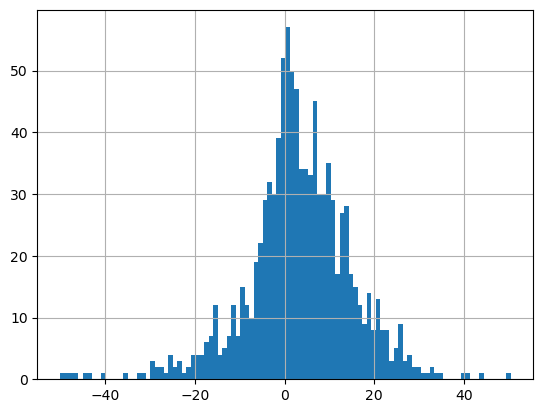

In [19]:
(HP.posterior['min_event_n_effective_lvk'] - HP.posterior['min_event_n_effective_gwpop']).hist(bins=100)

In [58]:
def compute_n_eff_from_different_event_samples_gwpop(parameters, suffix=1):
    gwpop = GWPopLoader(posterior_file = "/Users/asadh/Documents/Data/posteriors.pkl",
                    prior_file = "/Users/asadh/Documents/Data/production.prior",
                    vt_file = "/Users/asadh/Downloads/o1+o2+o3_bbhpop_real+semianalytic-LIGO-T2100377-v2.hdf5",
                    enforce_minimum_neffective_per_event = "injection_resampling_vt",
                    max_redshift = 2.3, samples_per_posterior=5000)
    gwpop.load_prior();
    gwpop.load_model();
    gwpop.load_vt();
    gwpop.load_posteriors();
    gwpop.create_likelihood();
    
    cols = ['alpha', 'beta', 'mmax', 'mmin', 'lam', 'mpp', 'sigpp', 'delta_m', 'gaussian_mass_maximum',
       'mu_chi', 'sigma_chi', 'xi_spin', 'sigma_spin', 'lamb', 'amax','alpha_chi', 'beta_chi']

    param = parameters[cols].iloc[0,:].to_dict()

    gwpop.likelihood.parameters.update(param)

    from tqdm.auto import trange


    col_new = f'min_event_n_effective_gwpop_{suffix}'
    new_data = {col_new : np.zeros_like(parameters['min_event_n_effective'].values)}
    for i in range(1):
        param = parameters[cols].iloc[i,:].to_dict()
        gwpop.likelihood.parameters.update(param)
        new_data[col_new][i] = jnp.min(gwpop.likelihood.per_event_bayes_factors_and_n_effective_and_variances()[1])


    parameters.loc[:, col_new] = new_data[col_new];
    
    

compute_n_eff_from_different_event_samples_gwpop(HP.posterior, suffix=1)

20:17 bilby INFO    : Using SmoothedMassDistribution.
20:17 bilby INFO    : Created SmoothedMassDistribution with arguments {'mmin': 2, 'mmax': 100}
20:17 bilby INFO    : Using iid_spin_magnitude.
20:17 bilby INFO    : Using iid_spin_orientation.
20:17 bilby INFO    : Using PowerLawRedshift from gwpopulation.models.redshift.
20:17 bilby INFO    : Created gwpopulation.models.redshift.PowerLawRedshift with arguments {'z_max': 2.3}
20:17 bilby INFO    : Using SmoothedMassDistribution.
20:17 bilby INFO    : Created SmoothedMassDistribution with arguments {'mmin': 2, 'mmax': 100}
20:17 bilby INFO    : Using iid_spin_magnitude.
20:17 bilby INFO    : Using iid_spin_orientation.
20:17 bilby INFO    : Using PowerLawRedshift from gwpopulation.models.redshift.
20:17 bilby INFO    : Created gwpopulation.models.redshift.PowerLawRedshift with arguments {'z_max': 2.3}
20:17 bilby INFO    : Loading VT data from /Users/asadh/Downloads/o1+o2+o3_bbhpop_real+semianalytic-LIGO-T2100377-v2.hdf5.


In [85]:
param = HP.posterior[cols].iloc[3,:].to_dict()
param['sigpp'] = 1.05

In [86]:
param;

def n_eff_for_some_sampling(param):
    gwpop = GWPopLoader(posterior_file = "/Users/asadh/Documents/Data/posteriors.pkl",
                        prior_file = "/Users/asadh/Documents/Data/production.prior",
                        vt_file = "/Users/asadh/Downloads/o1+o2+o3_bbhpop_real+semianalytic-LIGO-T2100377-v2.hdf5",
                        enforce_minimum_neffective_per_event = "injection_resampling_vt",
                        max_redshift = 2.3, samples_per_posterior=5000)
    gwpop.load_prior();
    gwpop.load_model();
    gwpop.load_vt();
    gwpop.load_posteriors();
    gwpop.create_likelihood();

    cols = ['alpha', 'beta', 'mmax', 'mmin', 'lam', 'mpp', 'sigpp', 'delta_m', 'gaussian_mass_maximum',
       'mu_chi', 'sigma_chi', 'xi_spin', 'sigma_spin', 'lamb', 'amax','alpha_chi', 'beta_chi']

    gwpop.likelihood.parameters.update(param)
    N_eff = jnp.min(gwpop.likelihood.per_event_bayes_factors_and_n_effective_and_variances()[1])
    return N_eff



n_effs = [n_eff_for_some_sampling(param) for i in trange(100)]

  0%|          | 0/100 [00:00<?, ?it/s]

20:26 bilby INFO    : Using SmoothedMassDistribution.
20:26 bilby INFO    : Created SmoothedMassDistribution with arguments {'mmin': 2, 'mmax': 100}
20:26 bilby INFO    : Using iid_spin_magnitude.
20:26 bilby INFO    : Using iid_spin_orientation.
20:26 bilby INFO    : Using PowerLawRedshift from gwpopulation.models.redshift.
20:26 bilby INFO    : Created gwpopulation.models.redshift.PowerLawRedshift with arguments {'z_max': 2.3}
20:26 bilby INFO    : Using SmoothedMassDistribution.
20:26 bilby INFO    : Created SmoothedMassDistribution with arguments {'mmin': 2, 'mmax': 100}
20:26 bilby INFO    : Using iid_spin_magnitude.
20:26 bilby INFO    : Using iid_spin_orientation.
20:26 bilby INFO    : Using PowerLawRedshift from gwpopulation.models.redshift.
20:26 bilby INFO    : Created gwpopulation.models.redshift.PowerLawRedshift with arguments {'z_max': 2.3}
20:26 bilby INFO    : Loading VT data from /Users/asadh/Downloads/o1+o2+o3_bbhpop_real+semianalytic-LIGO-T2100377-v2.hdf5.
20:26 bilby

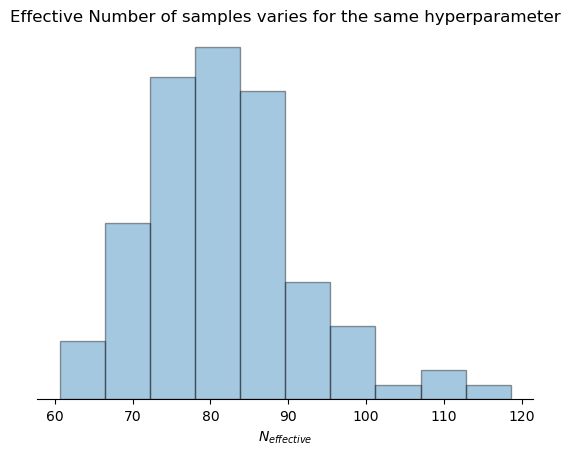

In [106]:
fig,ax = plt.subplots(1)
ax.hist(np.array([float(n) for n in n_effs]), bins=10, alpha=0.4, edgecolor='black')
#plt.grid(alpha=0.4)
plt.title("Effective Number of samples varies for the same hyperparameter")
plt.xlabel(r"$N_{effective}$")
plt.yticks(ticks=[])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [110]:
pd.DataFrame([param]).to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>alpha</th>\n      <th>beta</th>\n      <th>mmax</th>\n      <th>mmin</th>\n      <th>lam</th>\n      <th>mpp</th>\n      <th>sigpp</th>\n      <th>delta_m</th>\n      <th>gaussian_mass_maximum</th>\n      <th>mu_chi</th>\n      <th>sigma_chi</th>\n      <th>xi_spin</th>\n      <th>sigma_spin</th>\n      <th>lamb</th>\n      <th>amax</th>\n      <th>alpha_chi</th>\n      <th>beta_chi</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>3.157693</td>\n      <td>0.594983</td>\n      <td>87.589602</td>\n      <td>4.191087</td>\n      <td>0.033773</td>\n      <td>33.437041</td>\n      <td>1.05</td>\n      <td>6.744849</td>\n      <td>100.0</td>\n      <td>0.321885</td>\n      <td>0.041765</td>\n      <td>0.772619</td>\n      <td>3.193782</td>\n      <td>2.287428</td>\n      <td>1.0</td>\n      <td>1.360373</td>\n      <td>2.865901</td>\n    </tr>\n  </tb

In [106]:
X = HP.posterior[[col for col in HP.posterior.columns if "min_event" in col]].sort_values('min_event_n_effective_lvk', ascending=False)

#(X['min_event_n_effective_lvk'] - X['min_event_n_effective_gwpop']).abs().hist()

In [97]:
#gwpop.likelihood.hyper_prior.models

In [86]:
param = HP.posterior.iloc[0,:].to_dict()
gwpop.likelihood.hyper_prior.parameters.update(param)
gwpop.likelihood.parameters.update(param)
gwpop.selection.data.__dict__

{'mass_1': array([17.39769745, 27.59049225, 34.87878799, ..., 45.73864544,
        51.90734739, 35.8333281 ]),
 'mass_ratio': array([0.89051247, 0.88072689, 0.98982847, ..., 0.98976494, 0.87312348,
        0.90983453]),
 'a_1': array([0.66609327, 0.77165711, 0.41970315, ..., 0.45309051, 0.00470902,
        0.48066029]),
 'a_2': array([0.84130038, 0.26786459, 0.2287109 , ..., 0.9919398 , 0.44948848,
        0.93711565]),
 'cos_tilt_1': array([-0.37940198, -0.17241716,  0.21326955, ..., -0.17223099,
        -0.56725815, -0.16667346]),
 'cos_tilt_2': array([ 0.38100872,  0.5378555 , -0.14621086, ..., -0.1658206 ,
         0.80703564, -0.1641033 ]),
 'redshift': array([0.19250949, 0.3339659 , 0.98206556, ..., 0.29160039, 0.12487546,
        0.33013271]),
 'prior': array([1.09751025e-04, 9.41494849e-05, 2.51845033e-04, ...,
        3.36005874e-05, 2.40199909e-06, 8.27588353e-05]),
 'total_generated': 73280198,
 'analysis_time': 2.000455579638502}

In [89]:
HP.likelihood.selection_data.selection_data

{'chi_1': Array([0.31672513, 0.21669604, 0.7006181 , ..., 0.48712313, 0.54025084,
        0.7191248 ], dtype=float32),
 'chi_2': Array([0.04297358, 0.06823642, 0.7064053 , ..., 0.09984531, 0.400471  ,
        0.42463946], dtype=float32),
 'cos_tilt_1': Array([-0.23415683, -0.61672103,  0.04585635, ..., -0.18650195,
        -0.5542988 ,  0.0597887 ], dtype=float32),
 'cos_tilt_2': Array([ 0.33189133,  0.01550638,  0.40834042, ..., -0.84255725,
        -0.07490518, -0.3333309 ], dtype=float32),
 'mass_1_source': Array([21.69963  ,  2.9947522, 67.80235  , ..., 52.10508  , 78.62993  ,
        22.66006  ], dtype=float32),
 'mass_ratio': Array([0.6572521 , 0.74045724, 0.7917427 , ..., 0.9512581 , 0.5654659 ,
        0.8094273 ], dtype=float32),
 'prior': Array([1.2179129e-04, 1.1432290e-03, 3.0534142e-05, ..., 1.3186256e-05,
        6.8140262e-06, 9.9060104e-05], dtype=float32),
 'redshift': Array([0.33039278, 0.06043054, 0.72043896, ..., 0.24190775, 0.398873  ,
        0.27404925], dtype=fl

In [32]:
#gwpop.likelihood.hyper_prior.parameters.update(param)
#gwpop.likelihood.hyper_prior.prob(HP.likelihood.event_data)  
jnp.exp(jax.scipy.special.logsumexp( HP.likelihood.sampled_compute_log_weights(HP.likelihood.event_data, param), axis=-1) - jnp.log(HP.likelihood.N_posterior_samples))

Array([2.0753734e-03, 3.7031138e-01, 3.7521461e-03, 3.0098032e-05,
       4.5359102e-03, 6.3284419e-02, 1.7036628e-03, 7.5657060e-04,
       4.0578926e-03, 1.2254961e-03, 2.4986234e-02, 1.2426124e-03,
       2.3843190e-03, 2.5145677e-03, 2.6968985e-06, 4.5597120e-04,
       7.6035467e-06, 4.5530312e-02, 8.5557607e-05, 2.1165518e-01,
       1.3820406e-03, 6.2393275e-04, 2.6170665e-06, 4.3209223e-04,
       2.4989687e-04, 5.0906377e-04, 3.9673102e-04, 2.8920851e-05,
       2.4581398e-03, 5.2377163e-04, 3.9899796e-03, 8.2167853e-06,
       7.4866039e-05, 6.8881217e-04, 2.0135101e-04, 2.1122487e-01,
       1.4158292e-01, 6.4699620e-04, 3.3696176e-04, 7.3617399e-03,
       1.6694199e-07, 1.0564919e-05, 1.9021374e-01, 5.4629393e-02,
       2.8530234e-05, 4.0244844e-04, 1.5697543e-01, 1.8866572e-01,
       4.1880840e-01, 9.6861042e-02, 2.2976189e-03, 2.2756952e-01,
       5.3764542e-04, 5.2048745e-05, 5.4535743e-05, 6.9837715e-04,
       2.1089856e-04, 4.8250705e-01, 1.4940493e-03, 3.0795351e

In [16]:
import inspect

print(inspect.getsource(gwpop.likelihood.per_event_bayes_factors_and_n_effective_and_variances))

    def per_event_bayes_factors_and_n_effective_and_variances(self):
        """
        Called by `_compute_per_event_ln_bayes_factors` to compute the
        per event BFs, effective number of samples for each event's computed
        BF, and the associated uncertainty (variance) in the *ln* BF. Computes
        same qunatities as superclass function `_compute_per_event_ln_bayes_factors`
        but additionally provides the effective sample size.

        Returns
        -------
        per_event_bfs: array-like
            The BF per event, computed by reweighting single-event likelihood
            samples into the `hyper_prior` model.
        n_effectives: array-like
            The effective sample size for each Monte Carlo sum computation of the BFs.
            The BF is computed for each event, so this array has length n_events.
        variance: array-like
            The variances (uncertainties) in the ln BF per event.
        """
        weights = self.hyper_prior.prob(se

In [75]:
gwpop.likelihood.hyper_prior.models

 <function gwpopulation.models.spin.iid_spin_magnitude_beta(dataset, amax=1, alpha_chi=1, beta_chi=1)>,
 <function gwpopulation.models.spin.iid_spin_orientation_gaussian_isotropic(dataset, xi_spin, sigma_spin)>,

In [36]:
HP.likelihood.compute_event_N_eff_only(param)

Array(27.757746, dtype=float32)